In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt
import plotly_express as px
%matplotlib inline

In [34]:
load_raw = False
file_name = 'stats'
all_data = True
if load_raw:
    with open(file_name+'.txt') as f:
        content = f.readlines()
        
    content2 = [content[0].replace('\t',',').replace('\n','').split(',')]
    for i in range(1,len(content)):
        if i % 2 == 0:
            line1 = content[i-1].replace('\n','').split(',')
            line2 = content[i].replace('\t',',').replace('\n','').split(',') 
            content2.append(line1+line2) 
    data=pd.DataFrame(content2[1:])
    data.columns=content2[0]
    if all_data:
        data = data[(data['2FG%'] != '-') & (data['3P%'] != '-')]
    else:
         data = data[(data['2FG%'] != '-')]
    data.to_csv(file_name+'.csv',index=False)

In [35]:
data = pd.read_csv(file_name+'.csv')
if all_data:
    data_all = data[(data['2FGA'] > 10 ) & (data['3PA'] > 10)]
else:
    data_close_range = data[(data['2FGA'] > 10 ) ]

In [38]:
data = data_all.merge(data_close_range,on=["PLAYER",'TEAM','AGE'])

In [39]:
data['2FG%-mid'] = ((data['2FGM_x']-data['2FGM_y'])/(data['2FGA_x']-data['2FGA_y']))*100

In [40]:
data.to_csv('data_all.csv')

In [42]:
data = pd.read_csv('data_all.csv')

In [43]:
# data['2FG-exp'] = data['2FG%_x']*2/100
# data['2FG-mid-exp'] = data['2FG%_mid']*2/100
# data['3FG-exp'] = data['3P%_x']*3/100

In [44]:
px.scatter(data,x = '2FG%_x', y= '3P%_x',labels={'2FG%_x':'2-point Field Goal Percentage','3P%_x':'3-point Filed Goal Percentage'},
           hover_name='PLAYER',size='2FGA_x',color='TEAM',range_x=[20,80],range_y=[20,80])
# plt.plot(np.arange(160),np.arange(160),'r')
# plt.xlabel('2-point Field Goal Percentage')
# plt.ylabel('3-point Filed Goal Percentage')

In [45]:
px.scatter(data,x = '2FG%-mid', y= '3P%_x',labels={'2FG%-mid':'2-point Field Goal Percentage','3P%_x':'3-point Filed Goal Percentage'},
           hover_name='PLAYER',size='2FGA_x',color='TEAM',range_x=[20,60],range_y=[20,60])

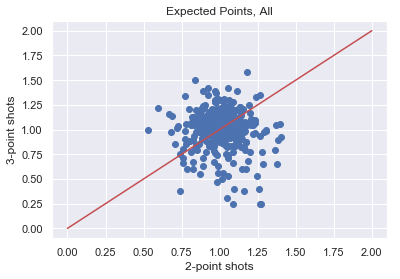

In [46]:
plt.scatter(data['2FG%_x']*2/100,data['3P%_x']*3/100)
plt.plot(np.arange(3),np.arange(3),'r')
plt.xlabel('2-point shots')
plt.ylabel('3-point shots')
plt.title('Expected Points, All');

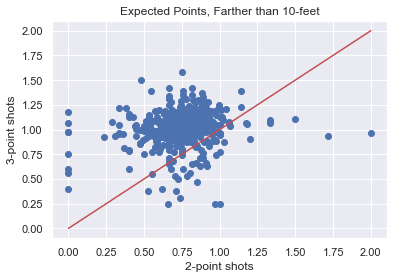

In [47]:
plt.scatter(data['2FG%-mid']*2/100,data['3P%_x']*3/100)
plt.plot(np.arange(3),np.arange(3),'r')
plt.xlabel('2-point shots')
plt.ylabel('3-point shots')
plt.title('Expected Points, Farther than 10-feet');